In [1]:
!wget ftp://hgdownload.cse.ucsc.edu/goldenPath/hg19/database/hapmapSnpsCEU.txt.gz

--2017-08-10 15:22:19--  ftp://hgdownload.cse.ucsc.edu/goldenPath/hg19/database/hapmapSnpsCEU.txt.gz
           => ‘hapmapSnpsCEU.txt.gz’
Resolving hgdownload.cse.ucsc.edu... 128.114.119.163
Connecting to hgdownload.cse.ucsc.edu|128.114.119.163|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /goldenPath/hg19/database ... done.
==> SIZE hapmapSnpsCEU.txt.gz ... 64728823
==> PASV ... done.    ==> RETR hapmapSnpsCEU.txt.gz ... done.
Length: 64728823 (62M) (unauthoritative)

hapmapSnpsCEU.txt.g 100%[===================>]  61.73M  11.2MB/s    in 6.1s    

2017-08-10 15:22:26 (10.1 MB/s) - ‘hapmapSnpsCEU.txt.gz’ saved [64728823]



In [5]:
!zless hapmapSnpsCEU.txt.gz | head

585	chr1	55298	55299	rs10399749	0	+	C/T	C	84	T	0	0
585	chr1	82570	82571	rs4030303	0	+	A/G	A	0	G	90	0
585	chr1	82651	82652	rs4030300	0	+	A/C	A	0	C	85	0
585	chr1	88168	88169	rs940550	0	+	C/T	C	0	T	90	0
585	chr1	91604	91605	rs13328714	0	+	C/T	C	89	T	0	0
586	chr1	232213	232214	rs11490937	0	+	A/G	A	0	G	90	0
589	chr1	534582	534583	rs6683466	0	+	C/G	C	90	G	0	0
589	chr1	546696	546697	rs12025928	0	+	A/G	A	0	G	89	0
589	chr1	564476	564477	rs6650104	12	+	A/G	A	160	G	0	4
589	chr1	564531	564532	rs11240781	0	+	A/G	A	0	G	89	0
cat: stdout: Broken pipe


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
col_names = ['track', 'chromosome', 'pos', 'pos0', 'name',
             'score', 'strand', 'alleles', 'allele1', 'homocount1', 'allele2', 'homocount2', 'heterocount']
hapmap_df = pd.read_csv('hapmapSnpsCEU.txt.gz', sep='\s+', names=col_names)

In [9]:
print(hapmap_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4029798 entries, 0 to 4029797
Data columns (total 13 columns):
track          int64
chromosome     object
pos            int64
pos0           int64
name           object
score          int64
strand         object
alleles        object
allele1        object
homocount1     int64
allele2        object
homocount2     int64
heterocount    int64
dtypes: int64(7), object(6)
memory usage: 399.7+ MB
None


In [10]:
hapmap_df.head()

,track,chromosome,pos,pos0,name,score,strand,alleles,allele1,homocount1,allele2,homocount2,heterocount
0,585,chr1,55298,55299,rs10399749,0,+,C/T,C,84,T,0,0
1,585,chr1,82570,82571,rs4030303,0,+,A/G,A,0,G,90,0
2,585,chr1,82651,82652,rs4030300,0,+,A/C,A,0,C,85,0
3,585,chr1,88168,88169,rs940550,0,+,C/T,C,0,T,90,0
4,585,chr1,91604,91605,rs13328714,0,+,C/T,C,89,T,0,0


In [11]:
hapmap_df['chromosome'].value_counts()

chr2     329812
chr1     314022
chr6     272238
chr3     259404
chr5     250717
chr4     248152
chr7     216149
chr8     215764
chr10    211700
chr11    206952
chr12    195132
chr9     183866
chr13    157461
chr14    124719
chrX     122462
chr20    121068
chr18    120207
chr16    111845
chr15    108448
chr17     92224
chr19     59601
chr22     55938
chr21     50983
chrY        722
chrM        212
Name: chromosome, dtype: int64

In [15]:
number_pattern = '\d'
autosome_mask = hapmap_df['chromosome'].str.contains(number_pattern)
hapmap_df = hapmap_df.loc[autosome_mask,:]
hapmap_df['chromosome'] = pd.to_numeric(hapmap_df['chromosome'].apply(lambda x: x[3:]))

In [16]:
hapmap_df.head()

,track,chromosome,pos,pos0,name,score,strand,alleles,allele1,homocount1,allele2,homocount2,heterocount
0,585,1,55298,55299,rs10399749,0,+,C/T,C,84,T,0,0
1,585,1,82570,82571,rs4030303,0,+,A/G,A,0,G,90,0
2,585,1,82651,82652,rs4030300,0,+,A/C,A,0,C,85,0
3,585,1,88168,88169,rs940550,0,+,C/T,C,0,T,90,0
4,585,1,91604,91605,rs13328714,0,+,C/T,C,89,T,0,0


In [17]:
hapmap_df['strand'].value_counts()

+    3905816
-        586
Name: strand, dtype: int64

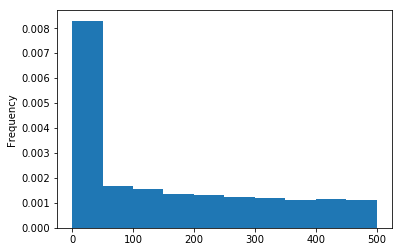

In [22]:
hapmap_df['score'].plot(kind='hist', normed=True)
plt.show()

In [23]:
!du -h gtex_v7_eur_imputed_maf0.01_chr1.txt.gz

 77M	gtex_v7_eur_imputed_maf0.01_chr1.txt.gz


In [24]:
hapmap_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3906402 entries, 0 to 3906401
Data columns (total 13 columns):
track          int64
chromosome     int64
pos            int64
pos0           int64
name           object
score          int64
strand         object
alleles        object
allele1        object
homocount1     int64
allele2        object
homocount2     int64
heterocount    int64
dtypes: int64(8), object(5)
memory usage: 417.2+ MB


In [26]:
!zless gtex_v7_eur_imputed_maf0.01_chr1.txt.gz | head | cut -f1-9

cat: stdout: Broken pipe
varID	R2	ER2	MAF	GTEX-111CU	GTEX-111FC	GTEX-111VG	GTEX-111YS	GTEX-1122O
1_11012_C_G_b37	0.10299	.	0.10547	0.192	0.157	0.171	0.346	0.138
1_13110_G_A_b37	0.17163	.	0.04032	0.064	0.036	0.014	0.037	0.051
1_13116_T_G_b37	0.10377	.	0.11979	0.218	0.172	0.054	0.098	0.319
1_13118_A_G_b37	0.10386	.	0.1198	0.218	0.172	0.054	0.098	0.319
1_13273_G_C_b37	0.07448	.	0.10821	0.204	0.204	0.187	0.104	0.192
1_14464_A_T_b37	0.10229	.	0.11705	0.219	0.159	0.053	0.226	0.234
1_14599_T_A_b37	0.08377	.	0.15325	0.317	0.551	0.081	0.321	0.305
1_14604_A_G_b37	0.08384	.	0.15326	0.317	0.551	0.081	0.321	0.305
1_14930_A_G_b37	0.07096	.	0.48639	1.004	1.255	1.211	0.999	1.04


In [55]:
dosage_dfs = []
for i in range(1,23):
    chr_n = str(i)
    dosage_file_name = 'gtex_v7_eur_imputed_maf0.01_chr{}.txt.gz'.format(chr_n)
    dosage_dfs.append(pd.read_csv(dosage_file_name, usecols=['varID', 'R2', 'ER2', 'MAF'], sep='\t',na_values='.'))
dosage_summaries = pd.concat(dosage_dfs)

In [56]:
dosage_summaries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8877507 entries, 0 to 126779
Data columns (total 4 columns):
varID    object
R2       float64
ER2      float64
MAF      float64
dtypes: float64(3), object(1)
memory usage: 338.7+ MB


In [57]:
dosage_summaries = pd.concat([dosage_summaries['varID'].str.split('_', expand=True), dosage_summaries], axis='columns')

In [58]:
dosage_summaries.columns = ['chromosome', 'pos', 'ref', 'alt', 'build', 'varID', 'R2', 'ER2', 'MAF']

In [63]:
dosage_summaries['pos0'] = pd.to_numeric(dosage_summaries['pos'])
dosage_summaries['chromosome'] = pd.to_numeric(dosage_summaries['chromosome'])

In [60]:
dosage_summaries.head()

,chromosome,pos,ref,alt,build,varID,R2,ER2,MAF
0,1,11012,C,G,b37,1_11012_C_G_b37,0.10299,NaN,0.10547
1,1,13110,G,A,b37,1_13110_G_A_b37,0.17163,NaN,0.04032
2,1,13116,T,G,b37,1_13116_T_G_b37,0.10377,NaN,0.11979
3,1,13118,A,G,b37,1_13118_A_G_b37,0.10386,NaN,0.11980
4,1,13273,G,C,b37,1_13273_G_C_b37,0.07448,NaN,0.10821


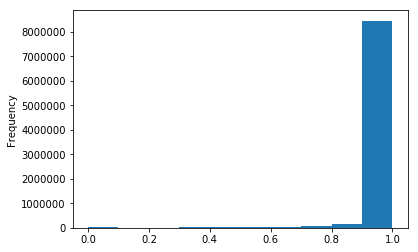

In [36]:
dosage_summaries['R2'].plot(kind='hist')
plt.show()

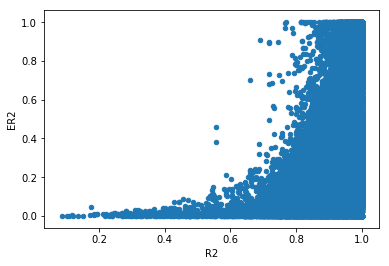

In [38]:
dosage_summaries.plot(kind='scatter', x='R2', y='ER2')
plt.show()

In [39]:
(dosage_summaries['R2'] >= 0.8).value_counts()

True     8607522
False     269985
Name: R2, dtype: int64

In [40]:
(dosage_summaries['R2'] == 1).value_counts()

False    4850686
True     4026821
Name: R2, dtype: int64

In [64]:
combined = pd.merge(hapmap_df, dosage_summaries, how='inner', on=['chromosome', 'pos0'])

In [65]:
combined.shape

(2710540, 21)

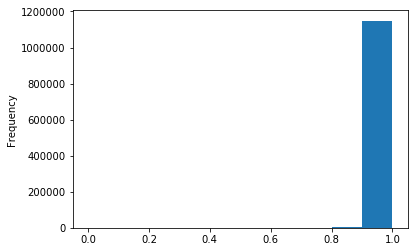

In [72]:
combined.loc[combined['R2'] < 1,'R2'].plot(kind='hist')
plt.show()

In [73]:
(combined['R2'] == 1).value_counts()

True     1545316
False    1165224
Name: R2, dtype: int64

In [74]:
(combined['R2'] >= 0.8).value_counts()

True     2698840
False      11700
Name: R2, dtype: int64

In [75]:
(combined['R2'] > 0.8).value_counts()

True     2698840
False      11700
Name: R2, dtype: int64

In [83]:
(combined['R2'] > 0.8).sum() / combined.shape[0]

0.99568351693758439

In [77]:
import numpy as np

cutoff_vals = np.linspace(0, 1, num=101)

In [81]:
n_snps = combined.shape[0]
find_portion_retained = np.vectorize(lambda x: (combined['R2'] >= x).sum() / n_snps)

portion_retained = find_portion_retained(cutoff_vals)

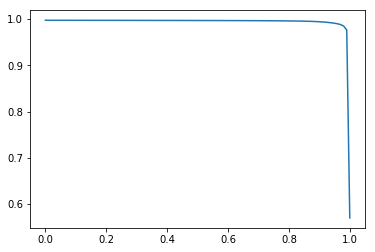

In [82]:
plt.plot(cutoff_vals, portion_retained)
plt.show()

In [85]:
(combined['R2'] > 0.9).sum() / combined.shape[0]

0.99394511794697737

In [87]:
original_snp_annots = []
for i in range(1, 23):
    chromosome = str(i)
    annot_file_name = "/Volumes/gtex-group/scott/gtex_snp_annot_chr{}.txt".format(chromosome)
    original_snp_annots.append(pd.read_csv(annot_file_name, sep='\t'))
    
original_snp_annot = pd.concat(original_snp_annots)

In [89]:
original_snp_annot.head()

,Chr,Pos,VariantID,Ref_b37,ALT,RS_ID_dbSNP142_GRCh37p13,RS_ID_dbSNP147_GRCh37p13,Num_alt_per_site
0,1,713092,1_713092_G_A_b37,G,A,rs4565649,rs4565649,1
1,1,715074,1_715074_A_G_b37,A,G,rs11804379,rs11804379,1
2,1,715205,1_715205_C_G_b37,C,G,rs141090730,rs141090730,1
3,1,717474,1_717474_C_T_b37,C,T,rs141784362,rs141784362,1
4,1,722603,1_722603_T_C_b37,T,C,rs138029171,rs138029171,1


In [88]:
 combined.head()

,track,chromosome,pos_x,pos0,name,score,strand,alleles,allele1,homocount1,...,homocount2,heterocount,pos_y,ref,alt,build,varID,R2,ER2,MAF
0,585,1,88168,88169,rs940550,0,+,C/T,C,0,...,90,0,88169,C,T,b37,1_88169_C_T_b37,0.11771,NaN,0.27911
1,589,1,564597,564598,rs6594028,0,+,A/G,A,0,...,85,0,564598,A,G,b37,1_564598_A_G_b37,0.24078,NaN,0.11939
2,589,1,565489,565490,rs7349153,0,+,C/T,C,87,...,0,0,565490,T,C,b37,1_565490_T_C_b37,0.22818,NaN,0.04220
3,589,1,565936,565937,rs7417504,0,+,C/T,C,90,...,0,0,565937,T,C,b37,1_565937_T_C_b37,0.09274,NaN,0.01590
4,589,1,566874,566875,rs2185539,0,+,C/T,C,89,...,0,0,566875,C,T,b37,1_566875_C_T_b37,0.97476,0.8441,0.03085


In [91]:
old_analysis = pd.merge(combined, original_snp_annot, left_on='name', right_on='RS_ID_dbSNP147_GRCh37p13')

In [92]:
old_analysis.shape

(1398103, 29)

In [93]:
original_snp_annot.shape

(5281272, 8)

In [94]:
old_analysis2 = pd.merge(combined, original_snp_annot, left_on='name', right_on='RS_ID_dbSNP142_GRCh37p13')

In [95]:
old_analysis2.shape

(1397735, 29)

In [96]:
original_snp_annot['ALT'].value_counts()

T    1429941
A    1423066
G    1217581
C    1210684
Name: ALT, dtype: int64